# Project 3, NLP - 03
### by Joomart Achekeev

In [1]:
import datetime
import random
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/full_data.csv')

In [3]:
df.head(2)

,title,selftext,created_utc,subr
0,The worst thing to ever be created . I present...,NaN,1637513002,2007scape
1,Opening 50 Elite Caskets &amp; 10 Master Caskets,NaN,1637512905,2007scape


In [4]:
df.shape

(72686, 4)

In [5]:
dfa = df.dropna()

In [6]:
dfa.shape

(22051, 4)

In [7]:
dfa = dfa.drop(dfa[dfa['selftext']=='[deleted]'].index)

In [8]:
dfa.value_counts('subr').head(15)

subr
PiratedGames           1560
DestinyTheGame         1504
Jokes                  1482
EscapefromTarkov       1474
explainlikeimfive      1417
MaliciousCompliance    1268
TwoXChromosomes        1256
DnD                    1069
Battlefield            1064
2007scape               938
MechanicalKeyboards     905
OutOfTheLoop            787
anime                   768
forza                   723
GTA                     581
dtype: int64

In [9]:
#This takes some time, creating a list of topics that have over 1000 legit non Null or [deleted]
#posts.
selected = sorted(list(set([topic for topic in dfa['subr'] if dfa[dfa['subr'] == topic].shape[0] > 1000])))

In [10]:
#checking the length
for sel in selected:
    print(sel)
    print(len(dfa[dfa['subr']==sel]))

Battlefield
1064
DestinyTheGame
1504
DnD
1069
EscapefromTarkov
1474
Jokes
1482
MaliciousCompliance
1268
PiratedGames
1560
TwoXChromosomes
1256
explainlikeimfive
1417


In [11]:
dfa[dfa['subr']==sel]

,title,selftext,created_utc,subr
62084,ELI5: Why the Heisenberg Uncertainty Principle...,I've seen a few of these from the search that ...,1342989966,explainlikeimfive
62085,ELI5: Why is some content available in the US ...,I know the providers have a licensing agreemen...,1342988749,explainlikeimfive
62086,ELI5: why racing cars have wide tires,Former MIT Professor Walter Lewin asked the qu...,1342987892,explainlikeimfive
62087,Major countries that were intervened by the U....,I'd like to know which countries (5-7) were th...,1342987069,explainlikeimfive
62088,Why racing cars have wider tires?,Former MIT Professor Walter Lewin asked the qu...,1342986986,explainlikeimfive
...,...,...,...,...
64077,ELI5 Cricket.,Seriously. No amount of research has explaine...,1341418870,explainlikeimfive
64079,[ELI5] (For areas North of the Tropic of Capri...,I understand specific heat to a small degree (...,1341415850,explainlikeimfive
64080,"ELI5: The Pen Tool (Photoshop,Illustrator, etc...","Seriously, I've used Photoshop for quite a few...",1341414946,explainlikeimfive
64082,Higgs Boson,Theres been a lot of talk about this in recent...,1341414618,explainlikeimfive


In [12]:
#taking out the subreddits that have more than 1000 posts into a separete dataframe
dfb = pd.DataFrame()
k = 0
for sel in selected:
    print(sel)
    dfb = pd.concat([dfb, dfa[dfa['subr']==sel]])
    k+=len(dfa[dfa['subr']==sel])
k

Battlefield
DestinyTheGame
DnD
EscapefromTarkov
Jokes
MaliciousCompliance
PiratedGames
TwoXChromosomes
explainlikeimfive


12094

In [13]:
dfb.to_csv('../data/final_data.csv', index=False)

In [14]:
dfb = dfb.reset_index()

## EDA

In [15]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [16]:
cvec = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=10_000, max_df=.95)

In [17]:
cvec.fit(dfb['title'])

CountVectorizer(max_df=0.95, max_features=10000, ngram_range=(1, 2),
                stop_words='english')

In [18]:
dfb_title_cvec = cvec.transform(dfb['title'])

In [19]:
dfb_title_cvec = pd.DataFrame(dfb_title_cvec.todense(), 
                          columns=cvec.get_feature_names())

In [20]:
dfb_title_cvec.shape

(12094, 10000)

In [21]:
#eli5 is the subreddit topic Explain like i am 5, nned to drop it
dfb_title_cvec.drop(columns='eli5', inplace=True)

In [22]:
eda_title_df = pd.concat([dfb['subr'], dfb_title_cvec], axis=1)

In [23]:
eda_title_df

,subr,000,06,08,09,09 24,09 25,09 26,0x06,0xc0000142,...,zero,zeroing,zombie,zombie apocalypse,zombies,zone,zones,zoo,zoo tycoon,zoom
0,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12089,explainlikeimfive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12090,explainlikeimfive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12091,explainlikeimfive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12092,explainlikeimfive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
btlfld_freq_w = eda_title_df[eda_title_df['subr']=='Battlefield'].drop('subr', axis=1).sum().sort_values(ascending=False).head(10)

In [61]:
eli5_freq_w = eda_title_df[eda_title_df['subr']=='explainlikeimfive'].drop('subr', axis=1).sum().sort_values(ascending=False).head(10)

In [88]:
eli5_freq_w_te = eda_text_df[eda_text_df['subr']=='explainlikeimfive'].drop('subr', axis=1).sum().sort_values(ascending=False).head(10)

In [62]:
mlco_freq_w = eda_title_df[eda_title_df['subr']=='MaliciousCompliance'].drop('subr', axis=1).sum().sort_values(ascending=False).head(10)

In [63]:
xx_freq_w = eda_title_df[eda_title_df['subr']=='TwoXChromosomes'].drop('subr', axis=1).sum().sort_values(ascending=False).head(10)

In [92]:
xx_freq_w_te = eda_text_df[eda_text_df['subr']=='TwoXChromosomes'].drop('subr', axis=1).sum().sort_values(ascending=False).head(10)

In [64]:
joke_freq_w = eda_title_df[eda_title_df['subr']=='Jokes'].drop('subr', axis=1).sum().sort_values(ascending=False).head(10)

In [90]:
joke_freq_w_te = eda_text_df[eda_text_df['subr']=='Jokes'].drop('subr', axis=1).sum().sort_values(ascending=False).head(10)

In [81]:
print(reversed(sorted(joke_freq_w)))

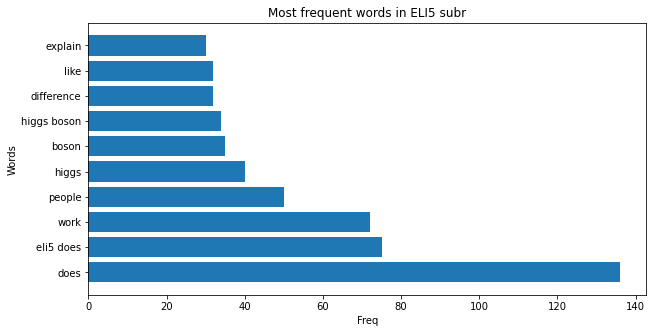

In [86]:
plt.figure(figsize=(10,5))
plt.title('Most frequent words in ELI5 subr')
plt.ylabel('Words')
plt.xlabel('Freq')
plt.barh(y=eli5_freq_w.index, width = eli5_freq_w)
plt.savefig('../graphs/eli5_xx.jpg');

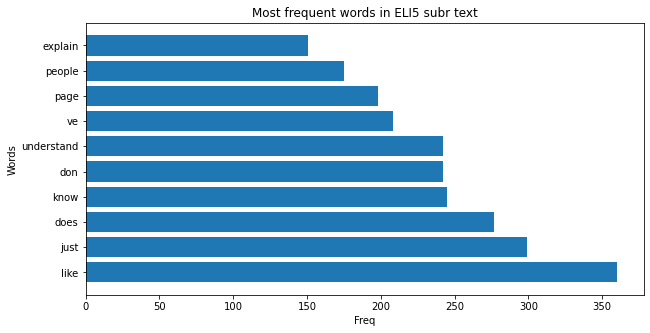

In [89]:
plt.figure(figsize=(10,5))
plt.title('Most frequent words in ELI5 subr text')
plt.ylabel('Words')
plt.xlabel('Freq')
plt.barh(y=eli5_freq_w_te.index, width = eli5_freq_w_te)
plt.savefig('../graphs/eli5_xx_te.jpg');

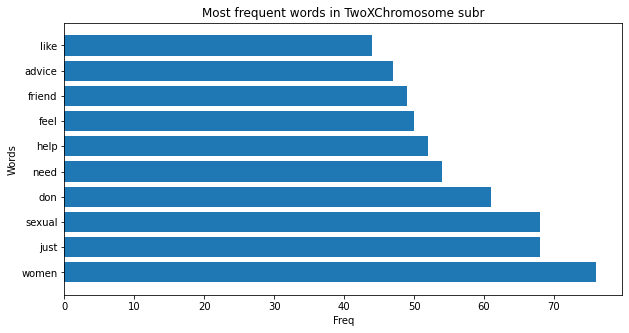

In [85]:
plt.figure(figsize=(10,5))
plt.title('Most frequent words in TwoXChromosome subr')
plt.ylabel('Words')
plt.xlabel('Freq')
plt.barh(y=xx_freq_w.index, width = xx_freq_w)
plt.savefig('../graphs/freq_xx.jpg');

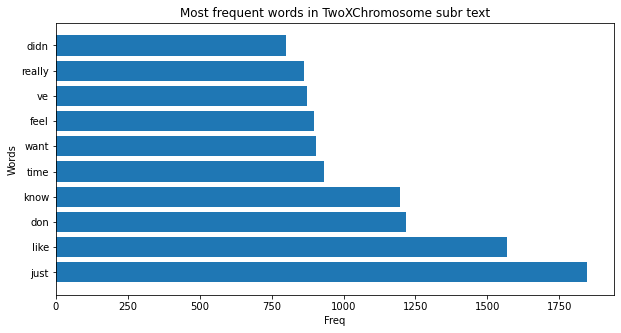

In [93]:
plt.figure(figsize=(10,5))
plt.title('Most frequent words in TwoXChromosome subr text')
plt.ylabel('Words')
plt.xlabel('Freq')
plt.barh(y=xx_freq_w_te.index, width = xx_freq_w_te)
plt.savefig('../graphs/freq_xxte.jpg');

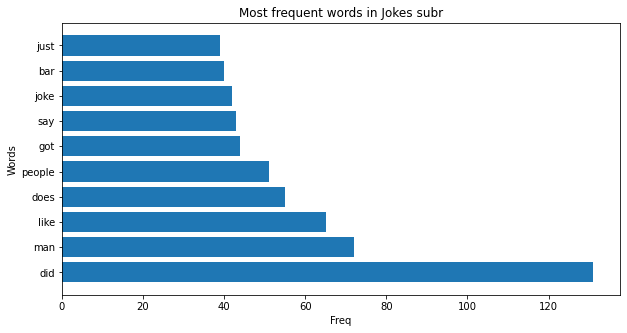

In [83]:
plt.figure(figsize=(10,5))
plt.title('Most frequent words in Jokes subr')
plt.ylabel('Words')
plt.xlabel('Freq')
plt.barh(y=joke_freq_w.index, width = joke_freq_w)
plt.savefig('../graphs/freq_jokes.jpg');

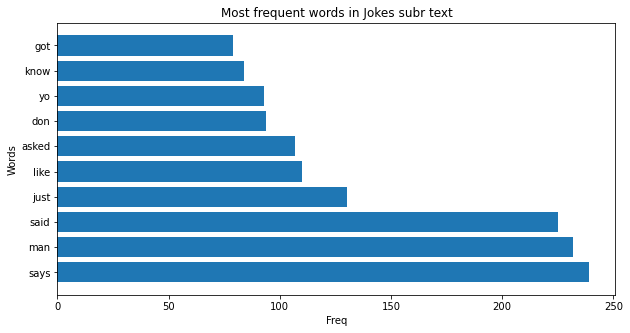

In [91]:
plt.figure(figsize=(10,5))
plt.title('Most frequent words in Jokes subr text')
plt.ylabel('Words')
plt.xlabel('Freq')
plt.barh(y=joke_freq_w_te.index, width = joke_freq_w_te)
plt.savefig('../graphs/freq_jokes_te.jpg');

In [24]:
dfb_title_cvec

,000,06,08,09,09 24,09 25,09 26,0x06,0xc0000142,10,...,zero,zeroing,zombie,zombie apocalypse,zombies,zone,zones,zoo,zoo tycoon,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


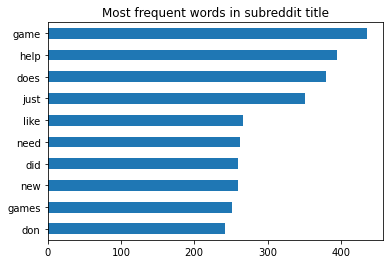

In [25]:
plt.title(f'Most frequent words in subreddit title')
dfb_title_cvec.sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh');

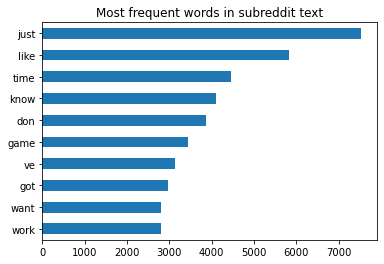

In [87]:
plt.title(f'Most frequent words in subreddit text')
dfb_text_cvec.sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh');

In [26]:
cvec_text = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=10_000, max_df=.95)

In [27]:
cvec_text.fit(dfb['selftext'])

CountVectorizer(max_df=0.95, max_features=10000, ngram_range=(1, 2),
                stop_words='english')

In [28]:
dfb_text_cvec = cvec.transform(dfb['selftext'])

In [29]:
dfb_text_cvec = pd.DataFrame(dfb_text_cvec.todense(), 
                          columns=cvec.get_feature_names())

In [30]:
dfb_text_cvec.shape

(12094, 10000)

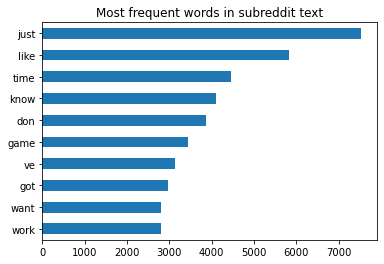

In [31]:
plt.title(f'Most frequent words in subreddit text')
dfb_text_cvec.sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh');

In [32]:
eda_text_df = pd.concat([dfb['subr'], dfb_text_cvec], axis=1)
eda_text_df

,subr,000,06,08,09,09 24,09 25,09 26,0x06,0xc0000142,...,zero,zeroing,zombie,zombie apocalypse,zombies,zone,zones,zoo,zoo tycoon,zoom
0,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Battlefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12089,explainlikeimfive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12090,explainlikeimfive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12091,explainlikeimfive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12092,explainlikeimfive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
eda_title_df.to_csv('../data/title_cvec.csv', index=False)

In [75]:
eda_text_df.to_csv('../data/text_cvec.csv', index=False)